# Final Project Report

* Class: DS 5100
* Student Name: Kyle Hoffman
* Student Net ID: zuc7ze
* This URL: https://github.com/HoffieKT/DS5100_FinalProject

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/HoffieKT/DS5100_FinalProject

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [7]:
'''
import numpy as np
import pandas as pd

class Die:
    """
    The Die class represents an object that has N sides (faces) and weighted probabilities,
    that can be rolled to select a face.
    """

    def __init__(self, faces):
        """
        Creates a Die object and saves the faces and weights of the Die in a private data frame.

        Parameters:
            faces (np.ndarray): A NumPy array of faces. Array can contain strings or numbers, but 
                                values must be distinct.

        Returns:
            N/A
        """

        # Check if faces is the correct dtype
        if isinstance(faces, np.ndarray) == False:
            raise TypeError('faces needs to be a NumPy array.')
        
        # Ensure that all the faces are unique (no repeated face values)
        if len(faces) != len(set(faces)):
            raise ValueError('All of the faces need to be unique.')
        
        # Save faces and weights (initialized to 1.0) to a private data frame
        self.__die_df = pd.DataFrame({'weight': [1.0]*len(faces)}, index = faces)

    def weight_changer(self, face_value, new_weight):
        """
        Changes the weight of a specified side (face)

        Parameters:
            face_value (str | int | float): Face value that is getting its weight changed
            new_weight (str | int | float): The new weight for teh specified face

        Returns:
            N/A
        """

        # Checks if the face value is on the Die
        if face_value not in self.__die_df.index:
            raise IndexError(str(face_value) + ' is not in faces')
        
        # See if the new weight is castable to a float (numeric)
        try:
            new_weight = float(new_weight)
        except TypeError:
            raise TypeError('Weights need to be numeric.')

        # Weight needs to be a value greater than or equal to 1
        if new_weight < 0:
            raise ValueError('Weights need to be positive numbers, including 0.')
        
        # Save weight change in the private data frame
        self.__die_df.at[face_value, 'weight'] = new_weight

    def roll(self, num_rolls=1):
        """
        Rolls the Die a specified number of times

        Parameters:
            num_rolls (int): Number of times to roll the Die. Defaulted to 1 if not specified.

        Returns:
            list: List of outcomes from the rolls
        """

        # turn weights into probabilities
        probabilities = self.__die_df['weight'] / self.__die_df['weight'].sum()
        return list(np.random.choice(self.__die_df.index, size=num_rolls, replace=True, p=probabilities))

    def show_currentState(self):
        """
        Shows the current state of the Die

        Parameters:
            N/A

        Returns:
            pd.DataFrame: Private Die data frame
        """

        return self.__die_df
    
class Game:
    """
    The Game class is made up of one or more similar Die objects, where a game of rolling the dice
    can happen one or more times.

    Similar Die objects simply mean they have the same number of sides and associated faces.
    """

    def __init__(self, die_list):
        """
        Creates the Game object and saves a die list attribute.

        Parameters:
            die_list (list): A list of similar Die objects

        Returns:
            N/A
        """

        # Save list of similar Die objects to die_list attribute
        self.die_list = die_list

    def play(self, num_rolls):
        """
        Rolls the Die object(s) a specified number of times, and saves the results in a private data frame.

        Parameters:
            num_rolls (int): Number of times to roll the Die object(s)

        Returns:
            N/A
        """

        # Checks if the number of rolls is an integer greater than 0
        if isinstance(num_rolls, int) == False or num_rolls < 1:
            raise ValueError('The number of rolls needs to be an integer greater than 0.')
        
        # Get the results of each roll iteration for all Die object(s)
        results = {}
        for i in range(len(self.die_list)):
            results[i] = self.die_list[i].roll(num_rolls)

        # Save the results in a private, wide format data frame with the roll_number as the index
        self.__game_df = pd.DataFrame(results)
        self.__game_df.index.name = 'roll number'

    def show(self, df_form='wide'):
        """
        Shows the results of the most recent play in a specified format

        Parameters:
            df_form (str): The desired format of the play results. Defaulted to wide format.
        
        Returns:
            pd.DataFrame: A wide or narrow format data frame.
        """

        # Check if a play as occurred by seeing if the private data frame exists yet
        if hasattr(self, '_Game__game_df') == False:
            raise AttributeError('A game has not been played yet. DataFrame does not exist.')
        
        # Check if a valid form was asked by the user
        if df_form == 'wide':
            return self.__game_df
        elif df_form == 'narrow':
            return self.__game_df.stack()
        else:
            raise ValueError('Requested form needs to be wide or narrow.')
        
class Analyzer:
    """
    The Analyzer class is responsible for providing various descriptive statitistical properties
    about the results from a single game.
    """

    def __init__(self, game):
        """
        Creates an Analyzer object

        Parameters:
            game (Game): A game

        Returns:
            N/A
        """
        if isinstance(game, Game) == False:
            raise ValueError('Analyzer class was initialized with an object that was not a Game object.')

        self.game = game
        self.results = self.game.show()

    def jackpot(self):
        """
        Calculates how many times a jackpot (all faces were the same) was hit in a game.

        Parameters:
            N/A

        Returns:
            int: The number of jackpots hit
        """
        return int(self.results.apply(lambda row: row.nunique() == 1, axis = 1).sum())

    def face_counts(self):
        """
        Determines how many times a given face value was rolled in each iteration.

        Parameters:
            N/A

        Returns:
            pd.DataFrame: Wide format data frame with roll number as index, face values as columns
                          and count values in the cells.
        """
        return self.results.apply(lambda row: row.value_counts(), axis=1).fillna(0).astype(int)

    def combo_counts(self):
        """
        Computes the count of distinct combinations of faces rolled.

        Parameters:
            N/A

        Returns:
            pd.DataFrame: MultiIndex data frame with the combinations as indices, and a column of 
                          associated counts.
        """

        # Get the distinct combinations
        combinations = self.results.apply(lambda row: tuple(sorted(row)), axis = 1)
        # Get the counts of the distinct combinations
        comboCount_df = combinations.value_counts().to_frame('count')
        # Turn tuple single index into a MultiIndex
        comboCount_df.index = pd.MultiIndex.from_tuples(comboCount_df.index, names = self.results.columns)
        return comboCount_df

    def permutation_counts(self):
        """
        Computes the count of distinct permutations of faces rolled.

        Parameters:
            N/A

        Returns:
            pd.DataFrame: MultiIndex data frame with the permutations as indices, and a column of 
                          associated counts.
        """

        # Get the distinct permutations
        permutations = self.results.apply(lambda row: tuple(row), axis = 1)
        # Get the counts of the distinct permutations
        permCount_df = permutations.value_counts().to_frame('count')
        # Turn the tuple single index into a MultiIndex
        permCount_df.index = pd.MultiIndex.from_tuples(permCount_df.index, names = self.results.columns)
        return permCount_df
'''

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [ ]:
'''
import unittest
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer

class MonteCarloTestSuite(unittest.TestCase):

    def test_Die__init__(self):
        self.assertTrue(Die(np.array(['H', 'T'])), Die)

    def test_Die_weight_changer(self):
        die = Die(np.array(['H', 'T']))
        die.weight_changer('T', 5)
        self.assertEqual(die.show_currentState().loc['T', 'weight'], 5)

    def test_Die_roll(self):
        die = Die(np.array(['H', 'T']))
        results = die.roll(10)
        self.assertTrue(isinstance(results, list))
        self.assertEqual(len(results), 10)

    def test_Die_show_currentState(self):
        die = Die(np.array(['H', 'T']))
        self.assertTrue(isinstance(die.show_currentState(), pd.DataFrame))

    def test_Game__init__(self):
        die = Die(np.array(['H', 'T']))
        self.assertTrue(isinstance(Game([die, die]), Game))

    def test_Game_play(self):
        die = Die(np.array(['H', 'T']))
        game = Game([die, die])
        game.play(num_rolls=5)
        self.assertEqual(game.show().index.nlevels, 1)

    def test_Game_show(self):
        die = Die(np.array(['H', 'T']))
        game = Game([die, die])
        game.play(num_rolls=5)
        self.assertTrue(isinstance(game.show(df_form='narrow').index, pd.MultiIndex))

    def test_Analyzer__init__(self):
        die = Die(np.array(['H', 'T']))
        game = Game([die, die])
        game.play(num_rolls=5)
        self.assertTrue(isinstance(Analyzer(game), Analyzer))

    def test_Analyzer_jackpot(self):
        die = Die(np.array(['H', 'T']))
        game = Game([die, die])
        game.play(num_rolls=5)
        analyzer = Analyzer(game)
        self.assertTrue(isinstance(analyzer.jackpot(), int))

    def test_Analyzer_face_counts(self):
        die = Die(np.array(['H', 'T']))
        game = Game([die, die])
        game.play(num_rolls=5)
        analyzer = Analyzer(game)
        self.assertTrue(isinstance(analyzer.face_counts(), pd.DataFrame))

    def test_Analyzer_combo_counts(self):
        die = Die(np.array(['H', 'T']))
        game = Game([die, die])
        game.play(num_rolls=5)
        analyzer = Analyzer(game)
        self.assertTrue(isinstance(analyzer.combo_counts().index, pd.MultiIndex))

    def test_Analyzer_permutation_counts(self):
        die = Die(np.array(['H', 'T']))
        game = Game([die, die])
        game.play(num_rolls=5)
        analyzer = Analyzer(game)
        self.assertTrue(isinstance(analyzer.permutation_counts().index, pd.MultiIndex))

if __name__ == '__main__':
    unittest.main(verbosity=3)
'''

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
# e.g. import montecarlo.montecarlo 
import montecarlo.montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
# help(montecarlo)
help(montecarlo.montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  The Analyzer class is responsible for providing various descriptive statitistical properties
     |  about the results from a single game.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Creates an Analyzer object
     |      
     |      Parameters:
     |          game (Game): A game
     |      
     |      Returns:
     |          N/A
     |  
     |  combo_counts(self)
     |      Computes the count of distinct combinations of faces rolled.
     |      
     |      Parameters:
     |          N/A
     |      
     |      Returns:
     |          pd.DataFrame: MultiIndex data frame with the combinations as indices, and a column of 
     |                        associated counts.
     |  
     |  face_counts(s

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/HoffieKT/DS5100_FinalProject/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
fair_coin = montecarlo.montecarlo.Die(np.array(['H', 'T']))

unfair_coin = montecarlo.montecarlo.Die(np.array(['H', 'T']))
unfair_coin.weight_changer('T', 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
coin_game = montecarlo.montecarlo.Game([fair_coin, unfair_coin])

In [9]:
coin_game.play(num_rolls = 1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [10]:
coin_game2 = montecarlo.montecarlo.Game([fair_coin, unfair_coin, unfair_coin])

In [13]:
coin_game2.play(num_rolls = 1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [15]:
game_analyzer1 = montecarlo.montecarlo.Analyzer(coin_game)
game1_jackpot = game_analyzer1.jackpot()
game1_jackpot

495

In [16]:
game_analyzer2 = montecarlo.montecarlo.Analyzer(coin_game2)
game2_jackpot = game_analyzer2.jackpot()
game2_jackpot

354

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [20]:
rel_freq1 = game1_jackpot / 1000
rel_freq1

0.495

In [21]:
rel_freq2 = game2_jackpot / 1000
rel_freq2

0.354

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

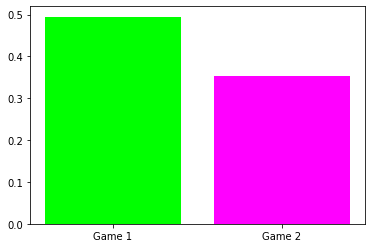

In [26]:
plt.bar(['Game 1', 'Game 2'], [rel_freq1, rel_freq2], color = ['lime', 'magenta'])
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [27]:
die1 = montecarlo.montecarlo.Die(np.array(['1', '2', '3', '4', '5', '6']))
die2 = montecarlo.montecarlo.Die(np.array(['1', '2', '3', '4', '5', '6']))
die3 = montecarlo.montecarlo.Die(np.array(['1', '2', '3', '4', '5', '6']))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [28]:
die3.weight_changer('6', 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [29]:
die1.weight_changer('1', 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [30]:
die_game1 = montecarlo.montecarlo.Game([die2, die2, die2, die2, die2])

In [31]:
die_game1.play(num_rolls = 10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [32]:
die_game2 = montecarlo.montecarlo.Game([die3, die1, die2, die2, die2])

In [33]:
die_game2.play(num_rolls = 10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [35]:
die_analyzer1 = montecarlo.montecarlo.Analyzer(die_game1)
die_analyzer2 = montecarlo.montecarlo.Analyzer(die_game2)

die_relFreq1 = die_analyzer1.jackpot() / 10000
die_relFreq2 = die_analyzer2.jackpot() / 10000

print(die_relFreq1)
print(die_relFreq2)

0.0006
0.0014


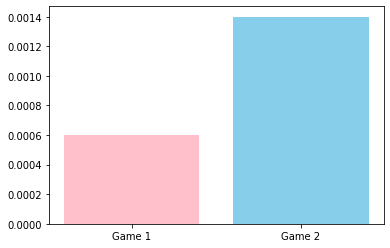

In [36]:
plt.bar(['Game 1', 'Game 2'], [die_relFreq1, die_relFreq2], color = ['pink', 'skyblue'])
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [5]:
letters_df = pd.read_csv(r'english_letters.txt', sep = ' ', header = None)
letters_df.columns = ['Letters', 'Freq']
letters_df.head()

,Letters,Freq
0,E,529117365
1,T,390965105
2,A,374061888
3,O,326627740
4,I,320410057


In [6]:
letter_die = montecarlo.montecarlo.Die(np.array(letters_df.Letters.tolist()))

In [7]:
for index, row in letters_df.iterrows():
    letter_die.weight_changer(row['Letters'], row['Freq'])

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [8]:
letter_game = montecarlo.montecarlo.Game([letter_die, letter_die, letter_die, letter_die])

In [9]:
letter_game.play(num_rolls = 1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [46]:
words_df = pd.read_csv(r'scrabble_words.txt', header = None)
words = words_df.loc[:,0].tolist()
words[0:5]

['AA', 'AAH', 'AAHED', 'AAHING', 'AAHS']

In [11]:
letter_analyzer = montecarlo.montecarlo.Analyzer(letter_game)

In [12]:
permutations = letter_analyzer.permutation_counts()

In [33]:
permutation_idx = permutations.index.to_flat_index()

In [39]:
permutation_idxList = ["".join(list(item)) for item in permutation_idx]
permutation_idxList[0:5]

['OSUE', 'OTEE', 'MERS', 'EIRA', 'AHOE']

In [48]:
diff = [item for item in permutation_idxList if item not in words]
diff_count = len(diff)
len(permutation_idxList) - diff_count

50

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [50]:
letter_game2 = montecarlo.montecarlo.Game([letter_die, letter_die, letter_die, letter_die, letter_die])
letter_game2.play(num_rolls = 1000)

In [51]:
letter_analyzer2 = montecarlo.montecarlo.Analyzer(letter_game2)
permutations2 = letter_analyzer2.permutation_counts()
permutation_idx2 = permutations2.index.to_flat_index()
permutation_idxList2 = ["".join(list(item)) for item in permutation_idx2]

In [52]:
diff2 = [item for item in permutation_idxList2 if item not in words]
diff_count2 = len(diff2)
len(permutation_idxList2) - diff_count2

8